<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      6173 non-null   object        
 4   cast          7982 non-null   object        
 5   country       8807 non-null   object        
 6   date_added    8797 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8803 non-null   object        
 9   duration      8804 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
 12  year_added    8797 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(10)
memory usage: 894.6+ KB


/tmp/ipython-input-2803164460.py:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['country'].fillna('Unknown', inplace=True)
/tmp/ipython-input-2803164460.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='type', data=df, palette='Set2')


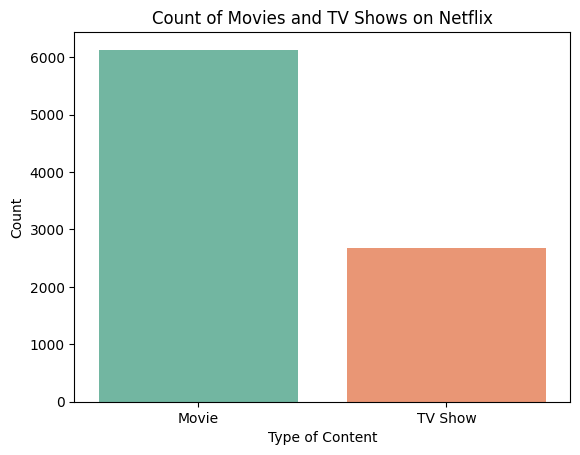

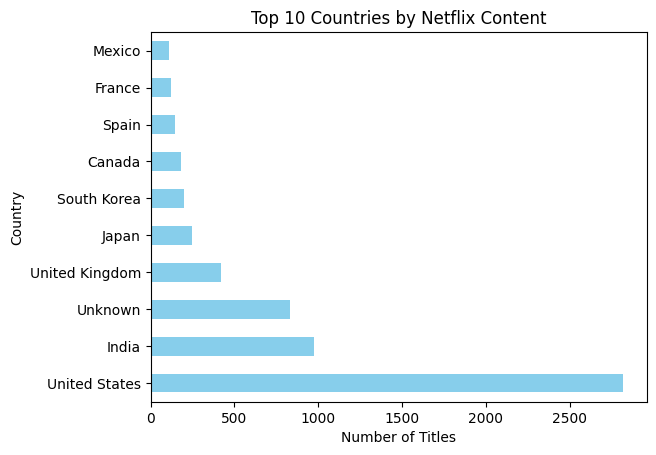

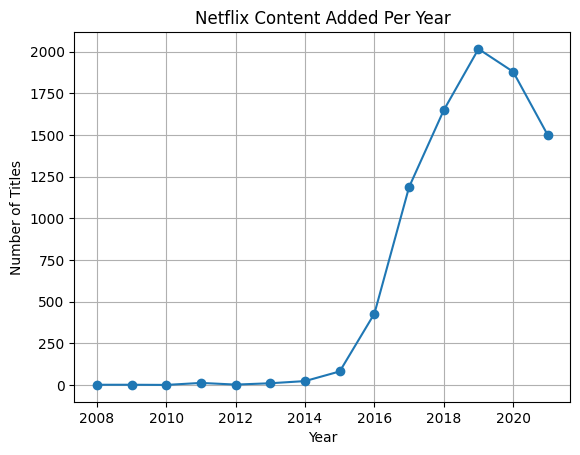

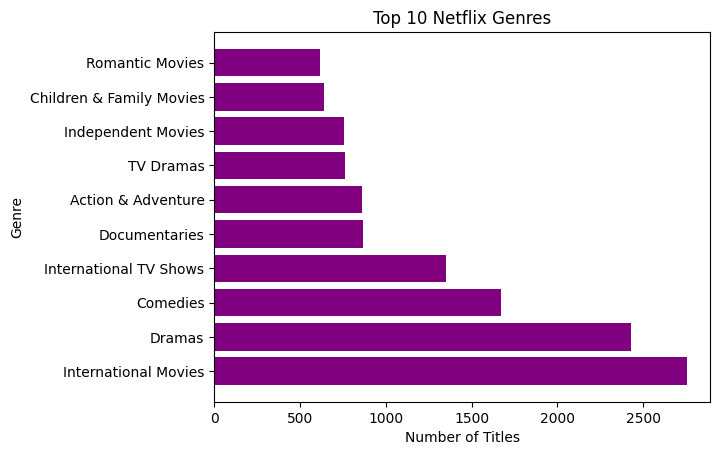

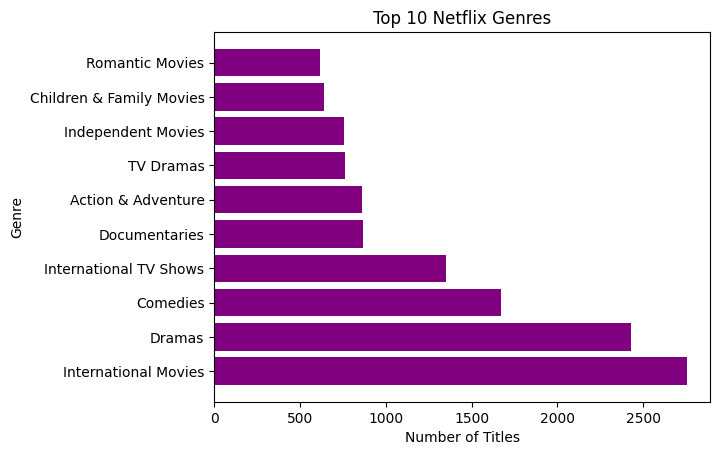

Summary of Findings:
- Netflix has more Movies than TV Shows.
- USA is the top content producer.
- Most content was added between 2018–2020.
- Top genres include Documentaries, Dramas, and Comedies.


In [4]:
# Step 1: Load tools
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Step 2: Read the file
df = pd.read_csv('netflix_titles.csv')

# Show the first 5 rows
df.head()
# Step 1: Check missing values in the dataset
df.isnull().sum()
# Step 2: Fill or remove missing values

# Step 1: Remove extra spaces from the 'date_added' column
df['date_added'] = df['date_added'].str.strip()

# Step 2: Convert 'date_added' to date format (automatically detects format)
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# Step 3: Create a new column for the year
df['year_added'] = df['date_added'].dt.year
df['country'].fillna('Unknown', inplace=True)
df['country'] = df['country'].fillna('Unknown')

df.info()
import seaborn as sns
import matplotlib.pyplot as plt

# Count the types of content
sns.countplot(x='type', data=df, palette='Set2')
plt.title("Count of Movies and TV Shows on Netflix")
plt.xlabel("Type of Content")
plt.ylabel("Count")
plt.show()
# Top 10 countries
top_countries = df['country'].value_counts().head(10)

# Plot
top_countries.plot(kind='barh', color='skyblue')
plt.title("Top 10 Countries by Netflix Content")
plt.xlabel("Number of Titles")
plt.ylabel("Country")
plt.show()
# Count of content added each year
df['year_added'].value_counts().sort_index().plot(kind='line', marker='o')
plt.title("Netflix Content Added Per Year")
plt.xlabel("Year")
plt.ylabel("Number of Titles")
plt.grid(True)
plt.show()
from collections import Counter

# Combine all genres
genres = ','.join(df['listed_in']).split(',')

# Count the top genres
genre_counts = Counter([genre.strip() for genre in genres])
top_genres = dict(sorted(genre_counts.items(), key=lambda x: x[1], reverse=True)[:10])

# Plot
plt.barh(list(top_genres.keys()), list(top_genres.values()), color='purple')
plt.title("Top 10 Netflix Genres")
plt.xlabel("Number of Titles")
plt.ylabel("Genre")
plt.show()
from collections import Counter

# Combine all genres
genres = ','.join(df['listed_in']).split(',')

# Count the top genres
genre_counts = Counter([genre.strip() for genre in genres])
top_genres = dict(sorted(genre_counts.items(), key=lambda x: x[1], reverse=True)[:10])

# Plot
plt.barh(list(top_genres.keys()), list(top_genres.values()), color='purple')
plt.title("Top 10 Netflix Genres")
plt.xlabel("Number of Titles")
plt.ylabel("Genre")
plt.show()
print("Summary of Findings:")
print("- Netflix has more Movies than TV Shows.")
print("- USA is the top content producer.")
print("- Most content was added between 2018–2020.")
print("- Top genres include Documentaries, Dramas, and Comedies.")
